# Desafio Machine Learning
Autor: Francisco de Assis Pereira Neto 

Data: 14/09/2021

## Importação dos dados

In [ ]:
import numpy as np
import pandas as pd
import scipy.sparse as sparse

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv')

In [ ]:
df.head(4)

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6


## Organizando os dados:

Separando o número de cápsulas em uma coluna


In [ ]:
df[['quantidade','descricao']] = df.descricao.str.split('|',expand=True)
df.head()

,descricao,criado,qtdInsumos,calculado,correto,quantidade
0,BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9,30 CAP
1,FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6,60 CAP
2,NAC 250MG; SILIMARINA 150MG; SAME 50MG,2020-08-05 22:51:09,3,105.1390,111.4,60 CAP
3,ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6,60 CAP
4,DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0,120 CAP


In [ ]:
df[['quant_cap','cap']] = df.quantidade.str.split(expand=True)
df.head()

,descricao,criado,qtdInsumos,calculado,correto,quantidade,quant_cap,cap
0,BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9,30 CAP,30,CAP
1,FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6,60 CAP,60,CAP
2,NAC 250MG; SILIMARINA 150MG; SAME 50MG,2020-08-05 22:51:09,3,105.1390,111.4,60 CAP,60,CAP
3,ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6,60 CAP,60,CAP
4,DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0,120 CAP,120,CAP


In [ ]:
df = df.drop(columns=['cap','quantidade'])
df.head()

,descricao,criado,qtdInsumos,calculado,correto,quant_cap
0,BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9,30
1,FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6,60
2,NAC 250MG; SILIMARINA 150MG; SAME 50MG,2020-08-05 22:51:09,3,105.1390,111.4,60
3,ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6,60
4,DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0,120


In [ ]:
df["quant_cap"] = pd.to_numeric(df["quant_cap"])
df.describe()

,qtdInsumos,calculado,correto,quant_cap
count,7121.000000,7121.000000,7121.000000,7121.000000
mean,3.281842,137.089552,135.891798,68.664935
std,3.194301,191.266516,189.806974,50.442119
min,1.000000,30.000100,33.000000,1.000000
25%,1.000000,49.786100,49.500000,30.000000
50%,2.000000,87.350300,83.100000,60.000000
75%,4.000000,165.167000,161.200000,90.000000
max,26.000000,10364.992500,10356.000000,900.000000


## Segmentação da coluna 'descricao' em frequência de nomes



### Será calculada a frequência de aparecimento em cada palavra, buscando entender os padrões textuais. 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
descricao = df['descricao'].values
descricao

array([' BUPROPIONA CLORIDRATO  150MG', ' FINASTERIDA 1:10  1MG',
       ' NAC  250MG; SILIMARINA  150MG; SAME  50MG', ...,
       ' MAGNESIO QUELADO 30%  220MG; SELENIO QUELADO  80MCG; CROMO GTF  250MCG; TRANSRESVERATROL  30MG; QUERCETINA  200MG; ZINCO QUELADO  15MG; COBRE QUELADO 0.600MG; METILFOLATO 1:10 0.400MG; VIT B12  100MCG; MANGANES QUELADO  1MG; COMPLEXO B 80MG CAPS  80MG',
       ' VALERIANA  50MG; PASSIFLORA  500MG; CAMOMILA EXT SECO  500MG',
       ' ACIDO TRANEXAMICO  200MG; BIOTINA 2.500MG'], dtype=object)

In [ ]:
vetorizacao = CountVectorizer()

In [ ]:
# Aplica o vetorizador nos dados
vetorizacao.fit(descricao)
vetorizacao

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
print(vetorizacao.vocabulary_)
mydict = vetorizacao.vocabulary_

{'bupropiona': 560, 'cloridrato': 666, '150mg': 76, 'finasterida': 839, '10': 4, '1mg': 115, 'nac': 1183, '250mg': 153, 'silimarina': 1472, 'same': 1436, '50mg': 265, 'anastrozol': 429, '300mg': 184, 'dutasterida': 768, 'tadalafil': 1515, '10mg': 24, 'triiodotironina': 1586, 'slow': 1488, 'release': 1398, '12mcg': 47, 't4': 1513, '60mcg': 292, 'vitamina': 1633, 'b2': 476, '30mg': 189, 'b3': 477, '60mg': 293, 'b5': 478, '70mg': 325, 'b6': 479, 'acido': 385, 'folico': 852, '3mg': 222, 'zinco': 1647, 'quelado': 1378, 'b12': 474, 'selenio': 1453, '200mcg': 124, 'magnesio': 1093, '30': 176, '400mg': 228, 'picolinato': 1307, 'de': 727, 'cromo': 705, '1000mcg': 11, 'saw': 1442, 'palmeto': 1263, 'ext': 811, 'seco': 1449, '200mg': 125, 'espironolactona': 797, '100mg': 16, 'pygeum': 1371, 'africanum': 393, '500mg': 261, 'cortisol': 697, '20mg': 130, 'prasterona': 1342, 'arginina': 446, '2g': 172, 'gestrinona': 892, '2mg': 174, 'coenzima': 676, 'q10': 1373, 'po': 1327, '300mcg': 183, '10000ui': 1

In [ ]:
vetor_nomes = vetorizacao.vocabulary_.keys()
vetor_nomes

dict_keys(['bupropiona', 'cloridrato', '150mg', 'finasterida', '10', '1mg', 'nac', '250mg', 'silimarina', 'same', '50mg', 'anastrozol', '300mg', 'dutasterida', 'tadalafil', '10mg', 'triiodotironina', 'slow', 'release', '12mcg', 't4', '60mcg', 'vitamina', 'b2', '30mg', 'b3', '60mg', 'b5', '70mg', 'b6', 'acido', 'folico', '3mg', 'zinco', 'quelado', 'b12', 'selenio', '200mcg', 'magnesio', '30', '400mg', 'picolinato', 'de', 'cromo', '1000mcg', 'saw', 'palmeto', 'ext', 'seco', '200mg', 'espironolactona', '100mg', 'pygeum', 'africanum', '500mg', 'cortisol', '20mg', 'prasterona', 'arginina', '2g', 'gestrinona', '2mg', 'coenzima', 'q10', 'po', '300mcg', '10000ui', 'k2', 'mk7', '100mcg', 'oxandrolona', '10mcg', 'clomifeno', 'citrato', '5mg', '50mcg', 'd3', '100', '4000ui', 'citrus', 'aurantium', 'camelia', 'sinensis', 'capsicum', 'annuum', '6mg', 'zingiber', 'officinalis', 'roscoe', 'cafeina', 'base', 'anidra', 'liq', 'cap', 'ate', '15mil', '5000ui', 'oleosa', 'oral', '1000ui', 'sol', 'mae', 'd

In [ ]:
matrix = vetorizacao.transform(descricao)
print(matrix.shape)

(7121, 1652)


In [ ]:
print(matrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
indices = pd.DataFrame(data=matrix.toarray(),columns=list(vetor_nomes))
indices.shape
## Tamanho do data.frame

(7121, 1652)

In [ ]:
indices = indices.apply(lambda x: x.astype('float'))
indices.head(10)

,bupropiona,cloridrato,150mg,finasterida,10,1mg,nac,250mg,silimarina,same,50mg,anastrozol,300mg,dutasterida,tadalafil,10mg,triiodotironina,slow,release,12mcg,t4,60mcg,vitamina,b2,30mg,b3,60mg,b5,70mg,b6,acido,folico,3mg,zinco,quelado,b12,selenio,200mcg,magnesio,30,...,cloroquin,fortificada,25ui,nalidixico,semente,clover,yam,mexicano,borico,2bi,2bil,pimentar,colealciferol,oleos,girassol,144mg,wellmune,oxyacantha,fi,rosehips,potencializado,metiltetrahidrofolato,dexametasona,glutalytic,biocortisol,ciclopirox,olamina,topica,glicerina,aloe,vera,glicolico,pca,na,gentamicina,dlfenilalanina,bacteroides,fragilis,andarine,microencapsula
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# indices.to_excel("indices.xlsx") 

In [ ]:
dados = pd.merge(df, indices, left_index=True, right_index=True)
dados.head(4)

,descricao,criado,qtdInsumos,calculado,correto,quant_cap,bupropiona,cloridrato,150mg,finasterida,10,1mg,nac,250mg,silimarina,same,50mg,anastrozol,300mg,dutasterida,tadalafil,10mg,triiodotironina,slow,release,12mcg,t4,60mcg,vitamina,b2,30mg,b3,60mg,b5,70mg,b6,acido,folico,3mg,zinco,...,cloroquin,fortificada,25ui,nalidixico,semente,clover,yam,mexicano,borico,2bi,2bil,pimentar,colealciferol,oleos,girassol,144mg,wellmune,oxyacantha,fi,rosehips,potencializado,metiltetrahidrofolato,dexametasona,glutalytic,biocortisol,ciclopirox,olamina,topica,glicerina,aloe,vera,glicolico,pca,na,gentamicina,dlfenilalanina,bacteroides,fragilis,andarine,microencapsula
0,BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NAC 250MG; SILIMARINA 150MG; SAME 50MG,2020-08-05 22:51:09,3,105.1390,111.4,60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6,60,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# corr = dados.corr()
# corr

Será necessário retirar algumas colunas, principalmente, a de data. Consiste em uma data do mesmo dia, se fossem dados de dias distintos seria interessante elaborar algo relacionado com séries tempoais.

In [ ]:
final = dados.drop(columns=['descricao','correto','criado']).apply(lambda x: x.astype('float'))
Y = dados[['correto']].values
final.head()

,qtdInsumos,calculado,quant_cap,bupropiona,cloridrato,150mg,finasterida,10,1mg,nac,250mg,silimarina,same,50mg,anastrozol,300mg,dutasterida,tadalafil,10mg,triiodotironina,slow,release,12mcg,t4,60mcg,vitamina,b2,30mg,b3,60mg,b5,70mg,b6,acido,folico,3mg,zinco,quelado,b12,selenio,...,cloroquin,fortificada,25ui,nalidixico,semente,clover,yam,mexicano,borico,2bi,2bil,pimentar,colealciferol,oleos,girassol,144mg,wellmune,oxyacantha,fi,rosehips,potencializado,metiltetrahidrofolato,dexametasona,glutalytic,biocortisol,ciclopirox,olamina,topica,glicerina,aloe,vera,glicolico,pca,na,gentamicina,dlfenilalanina,bacteroides,fragilis,andarine,microencapsula
0,1.0,47.5297,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,46.9620,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,105.1390,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,49.0314,60.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,161.8272,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Pacotes e aplicação do machine learning

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import model_selection


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

In [ ]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import linear_model


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Os pacotes usado são vários métodos de regressão por machine learning que depois serão comparados.

In [ ]:
## Validação é de 28,08594% ou seja 2000 dados
array = final.values
X = array

validation_size = 0.2808594298553574
seed = 250
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
Y_train

array([[ 57.6],
       [337. ],
       [ 59. ],
       ...,
       [ 39.9],
       [ 69.1],
       [ 61.4]])

In [ ]:
# Para validação, será usado pacotes de 15 (teste e treino)
num_folds = 15
scoring = 'neg_mean_squared_error'

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
models.append(('MLP', MLPRegressor()))

In [ ]:
# Métodos Boosting 
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Métodos Bagging 
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

O próximo comando fará a análise e comparação de todos os métodos listados. Vale salientar que pode sair o resultado por volta de 30 a 40 minutos. 

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
  names.append(name)
  ## k-fold análise:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  # converter o erro quadrático médio em positivo. Quanto mais baixo melhor
  cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, \
  scoring=scoring)
  kfold_results.append(cv_results)
  # Treinando com todo o período
  res = model.fit(X_train, Y_train)
  train_result = mean_squared_error(res.predict(X_train), Y_train)
  train_results.append(train_result)
  # Resultado do teste
  test_result = mean_squared_error(res.predict(X_test), Y_test)
  test_results.append(test_result)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

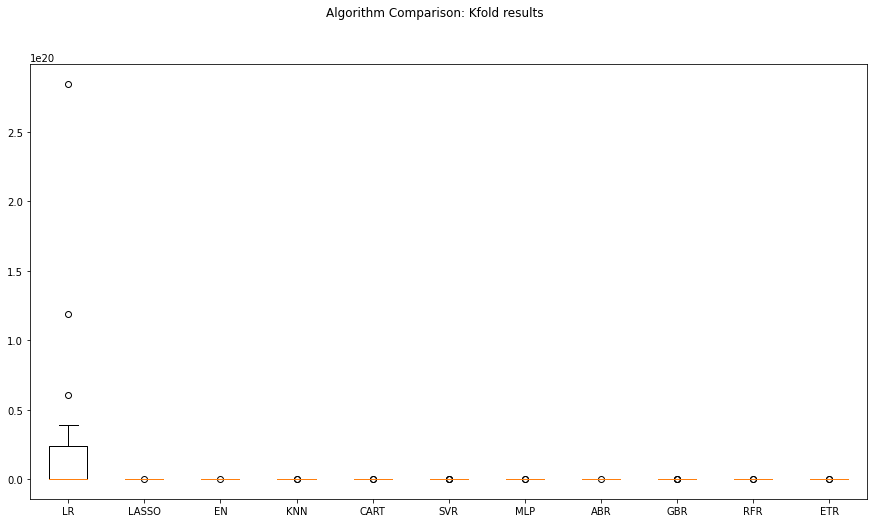

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

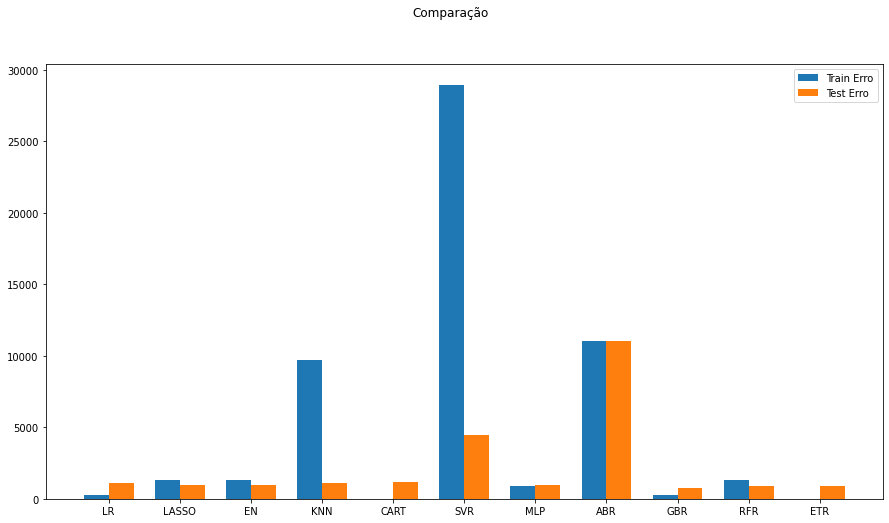

In [ ]:
# comparar algoritmos
fig = pyplot.figure()
ind = np.arange(len(names)) # os x são locais para os grupos
width = 0.35 # a largura das barras
fig.suptitle('Comparação')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results, width=width, label='Train Erro')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Erro')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
modelos = pd.DataFrame({'names':names,'kfold_res':kfold_results,'test_res':test_results,'treino_res':train_results})
modelos

,names,kfold_res,test_res,treino_res
0,LR,"[2.848956548768509e+20, 800.2882361565461, 1.1...",1080.407333,291.515059
1,LASSO,"[341.7415069408254, 799.8879903489053, 3135.57...",992.679870,1312.686463
2,EN,"[337.6090903777813, 796.8952950930227, 3132.40...",990.670435,1309.224343
3,KNN,"[406.85294371929814, 636.6341277426899, 3009.0...",1131.217075,9721.915279
4,CART,"[961.6947979532159, 673.7381067251462, 2272.25...",1183.596842,0.528209
5,SVR,"[8115.821836720037, 5239.276593974047, 3497.36...",4464.686410,28954.551766
6,MLP,"[364.04905625613065, 631.6617113700906, 3181.2...",993.206449,910.921170
7,ABR,"[16228.498806264883, 31730.178801812734, 5783....",11031.749938,11055.425446
8,GBR,"[605.4890976186002, 637.7318666188353, 2619.52...",752.849782,237.652044
9,RFR,"[388.95823195584734, 609.1804666349283, 2806.2...",922.004026,1325.387540


In [ ]:
# res = model.fit(X_train, Y_train) melhor modelo GBR
daaa = models[8]
# daaa[1]
best_model = daaa[1].fit(X_train, Y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# selecionando um dos melhores modelo:
daaa[1]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Construindo visualização para verificar os pontos preditos e os pontos reais

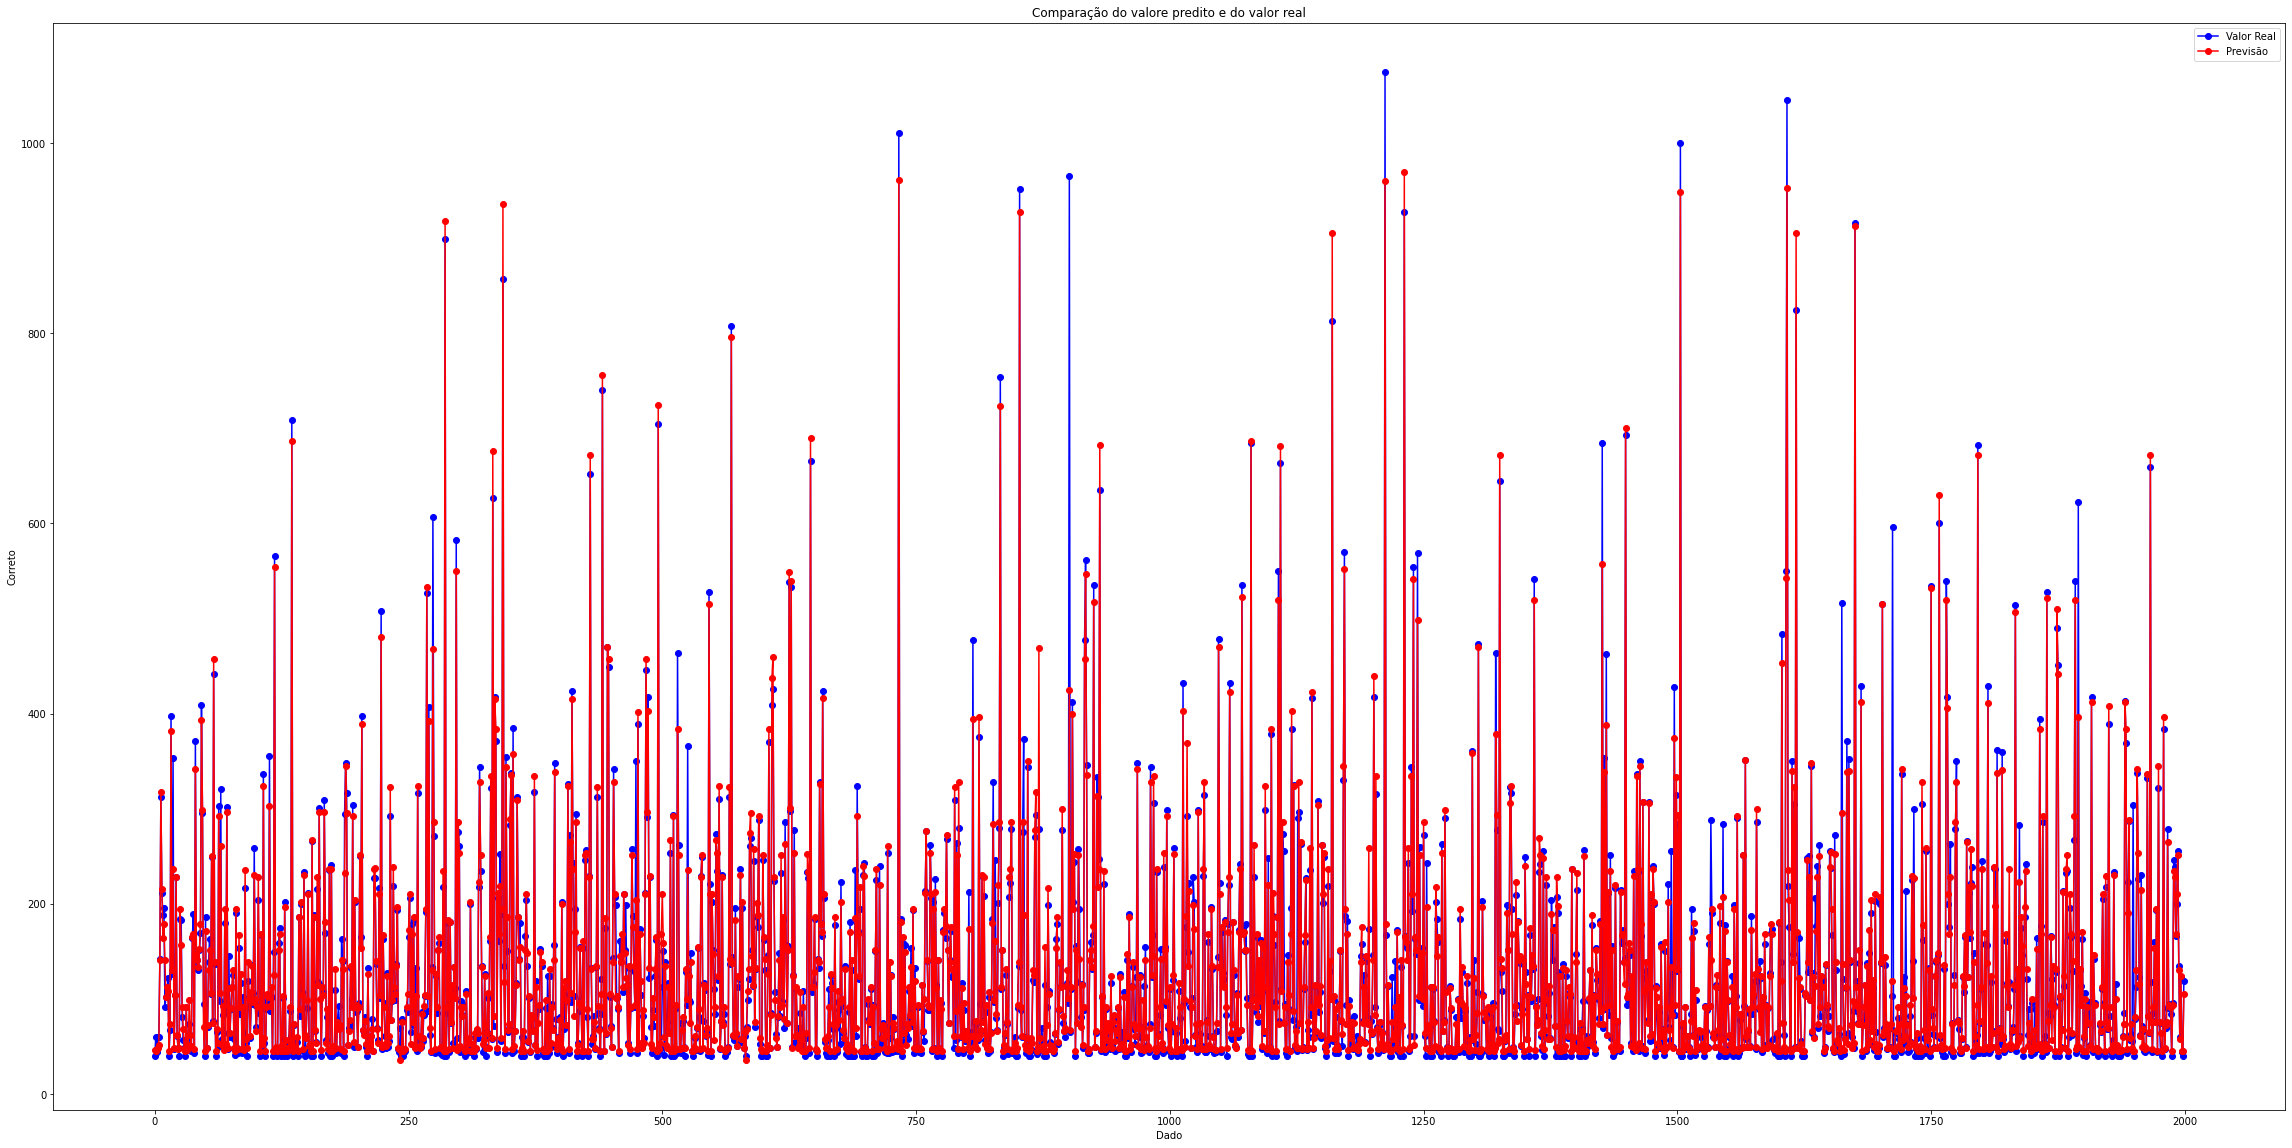

In [ ]:
Y_pred = best_model.predict(X_test)
# final_res = pd.DataFrame({'valor_predito': Y_pred,'valor_real': Y_test})
plt.figure(figsize=(40, 20))
plt.title("Comparação do valore predito e do valor real")
plt.plot(Y_test,label="Valor Real",color="blue",marker='o')
plt.plot(Y_pred,label="Previsão",color='red',marker='o')
plt.xlabel("Dado")
plt.ylabel("Correto")
plt.legend()

## Segmentando a comparação em 4 gráficos 

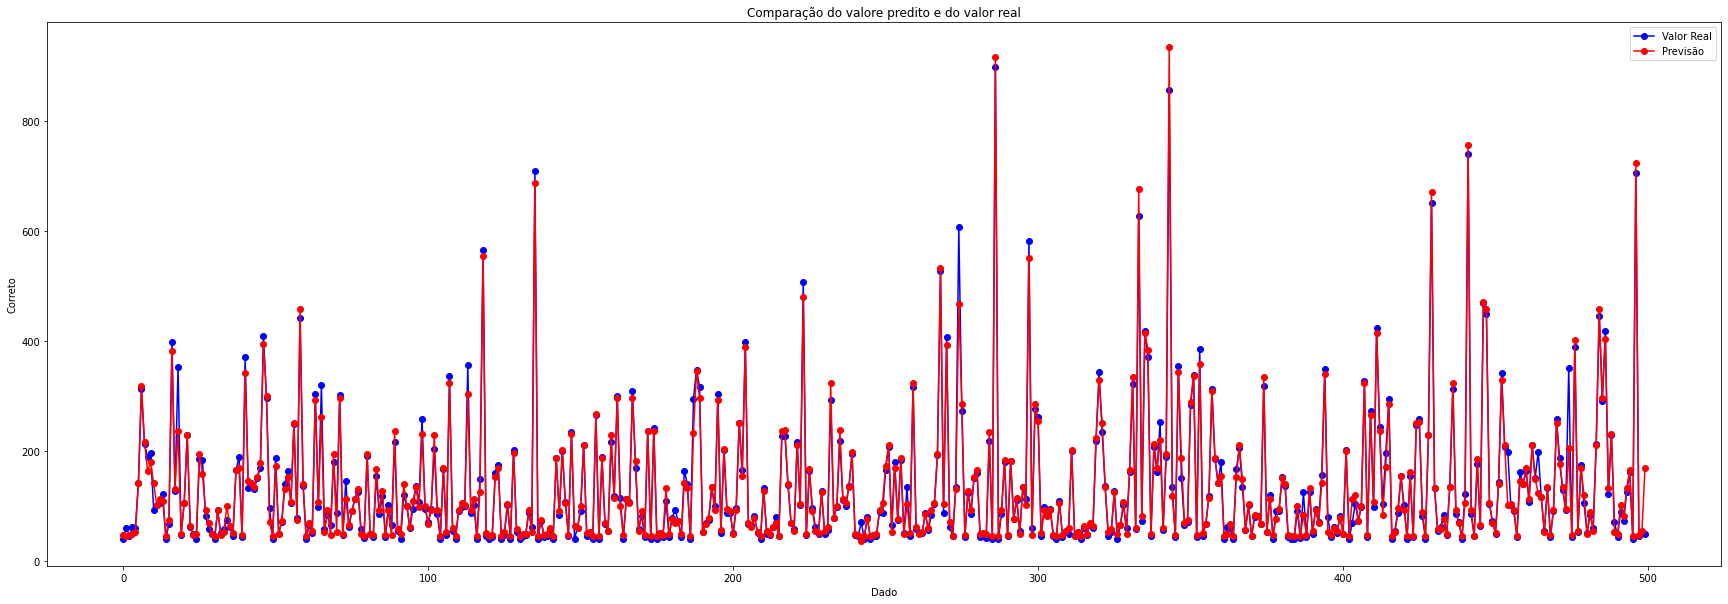

In [ ]:
plt.figure(figsize=(30, 10))
plt.title("Comparação do valore predito e do valor real")
plt.plot(Y_test[0:500],label="Valor Real",color="blue",marker='o')
plt.plot(Y_pred[0:500],label="Previsão",color='red',marker='o')
plt.xlabel("Dado")
plt.ylabel("Correto")
plt.legend()

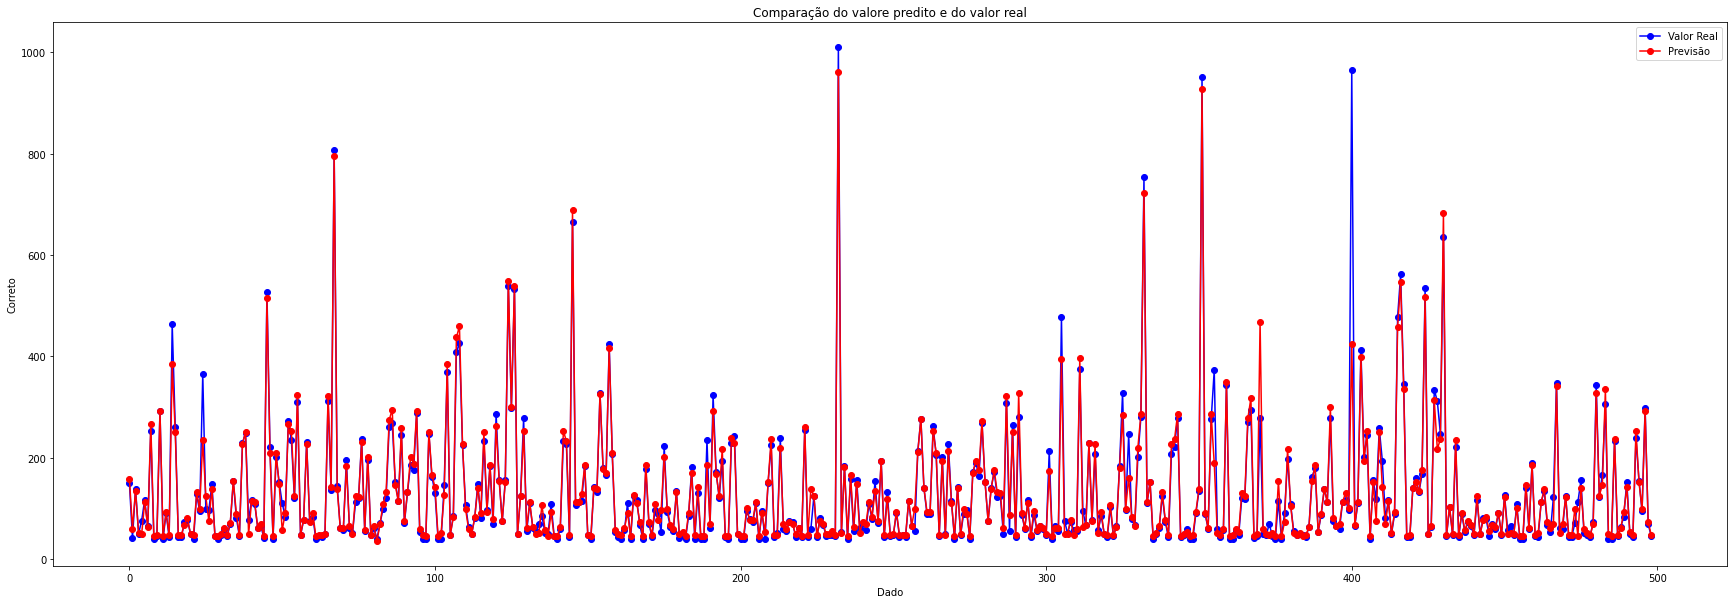

In [ ]:
plt.figure(figsize=(30, 10))
plt.title("Comparação do valore predito e do valor real")
plt.plot(Y_test[501:1000],label="Valor Real",color="blue",marker='o')
plt.plot(Y_pred[501:1000],label="Previsão",color='red',marker='o')
plt.xlabel("Dado")
plt.ylabel("Correto")
plt.legend()

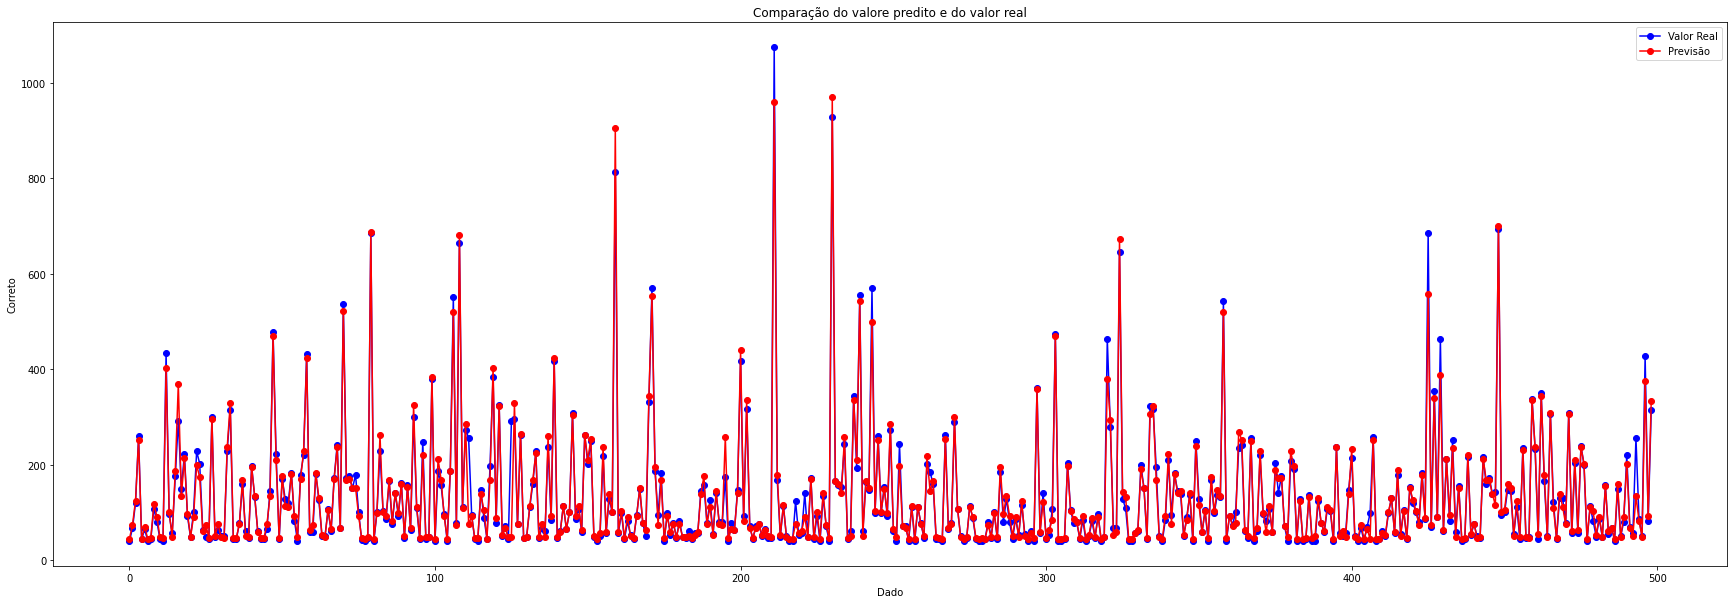

In [ ]:
plt.figure(figsize=(30, 10))
plt.title("Comparação do valore predito e do valor real")
plt.plot(Y_test[1001:1500],label="Valor Real",color="blue",marker='o')
plt.plot(Y_pred[1001:1500],label="Previsão",color='red',marker='o')
plt.xlabel("Dado")
plt.ylabel("Correto")
plt.legend()

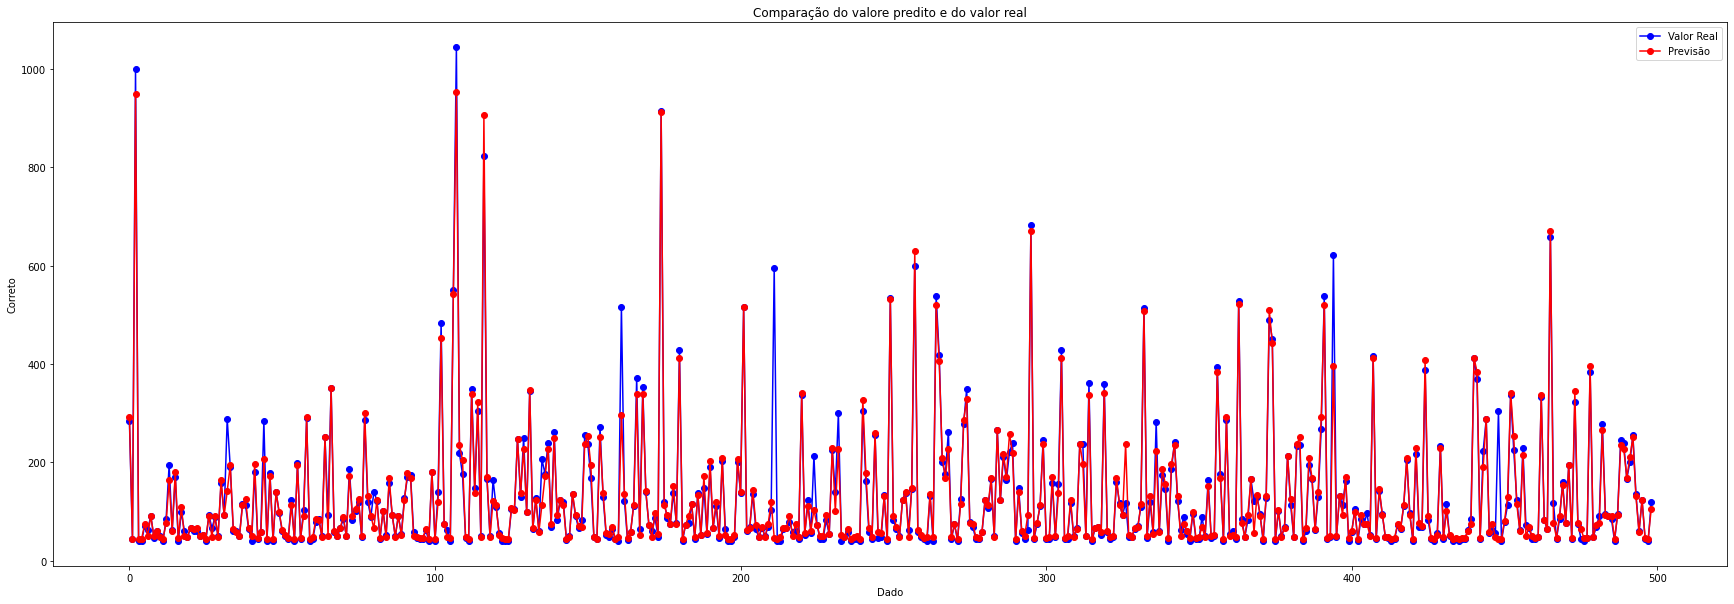

In [ ]:
plt.figure(figsize=(30, 10))
plt.title("Comparação do valore predito e do valor real")
plt.plot(Y_test[1501:2000],label="Valor Real",color="blue",marker='o')
plt.plot(Y_pred[1501:2000],label="Previsão",color='red',marker='o')
plt.xlabel("Dado")
plt.ylabel("Correto")
plt.legend()

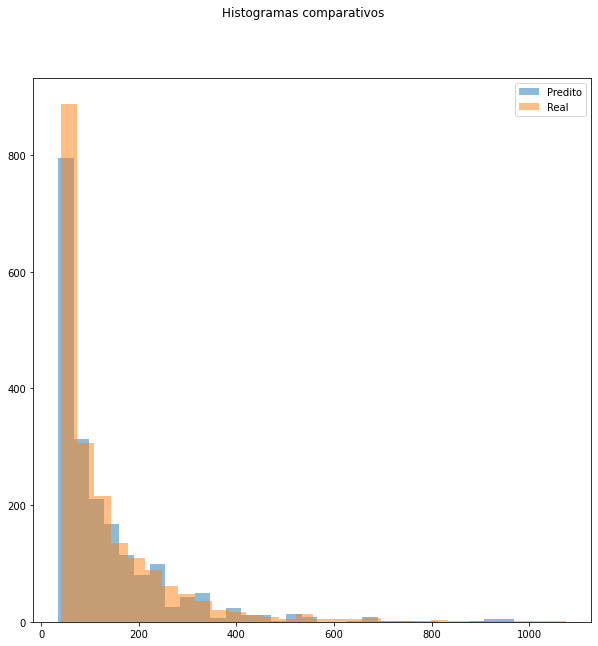

<Figure size 432x288 with 0 Axes>

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10,10))
plt.hist(Y_pred, bins=30, alpha=0.5, label='Predito')
plt.hist(Y_test, bins=30, alpha=0.5, label='Real')
f.suptitle('Histogramas comparativos')
plt.legend(loc='upper right')
plt.show()
plt.tight_layout()

## Visualização dos dados


In [ ]:
visualizar = pd.read_csv('https://raw.githubusercontent.com/manipulaeHealth/desafio-machine-learning/main/dados_preco.csv')
visualizar.head()

,descricao,criado,qtdInsumos,calculado,correto
0,30 CAP | BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9
1,60 CAP | FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6
2,60 CAP | NAC 250MG; SILIMARINA 150MG; SAME ...,2020-08-05 22:51:09,3,105.1390,111.4
3,60 CAP | ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6
4,120 CAP | DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0


In [ ]:
visualizar[['quantidade','descricao']] = visualizar.descricao.str.split('|',expand=True)
visualizar.head()

,descricao,criado,qtdInsumos,calculado,correto,quantidade
0,BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9,30 CAP
1,FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6,60 CAP
2,NAC 250MG; SILIMARINA 150MG; SAME 50MG,2020-08-05 22:51:09,3,105.1390,111.4,60 CAP
3,ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6,60 CAP
4,DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0,120 CAP


In [ ]:
visualizar[['capsulas','lll']] = visualizar.quantidade.str.split(expand=True)
visualizar.head()

,descricao,criado,qtdInsumos,calculado,correto,quantidade,capsulas,lll
0,BUPROPIONA CLORIDRATO 150MG,2020-08-05 23:19:09,1,47.5297,39.9,30 CAP,30,CAP
1,FINASTERIDA 1:10 1MG,2020-08-05 22:51:09,1,46.9620,43.6,60 CAP,60,CAP
2,NAC 250MG; SILIMARINA 150MG; SAME 50MG,2020-08-05 22:51:09,3,105.1390,111.4,60 CAP,60,CAP
3,ANASTROZOL 1:10 0.300MG,2020-08-05 22:51:09,1,49.0314,43.6,60 CAP,60,CAP
4,DUTASTERIDA 0.250MG; TADALAFIL 10MG,2020-08-05 22:49:09,2,161.8272,146.0,120 CAP,120,CAP


In [ ]:
visualizar["capsulas"] = pd.to_numeric(visualizar["capsulas"])
visualizar.describe()

,qtdInsumos,calculado,correto,capsulas
count,7121.000000,7121.000000,7121.000000,7121.000000
mean,3.281842,137.089552,135.891798,68.664935
std,3.194301,191.266516,189.806974,50.442119
min,1.000000,30.000100,33.000000,1.000000
25%,1.000000,49.786100,49.500000,30.000000
50%,2.000000,87.350300,83.100000,60.000000
75%,4.000000,165.167000,161.200000,90.000000
max,26.000000,10364.992500,10356.000000,900.000000


In [ ]:
visualizar = visualizar[['qtdInsumos','calculado','correto','capsulas']]
visualizar.head()

,qtdInsumos,calculado,correto,capsulas
0,1,47.5297,39.9,30
1,1,46.9620,43.6,60
2,3,105.1390,111.4,60
3,1,49.0314,43.6,60
4,2,161.8272,146.0,120


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


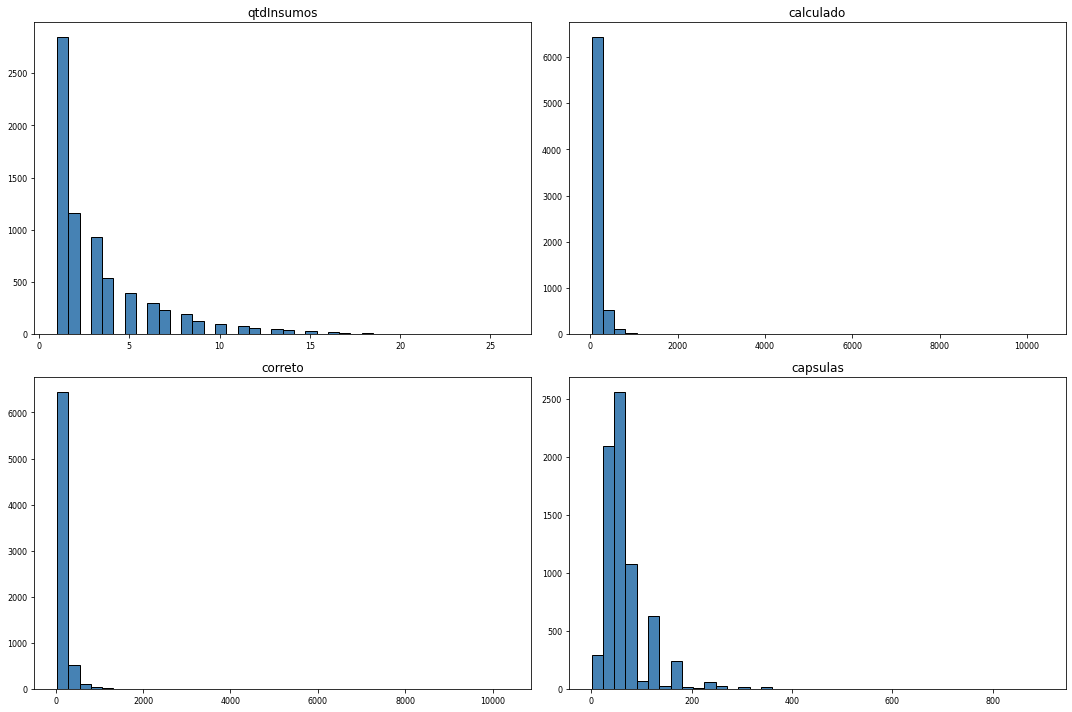

In [ ]:
# Histograma dos dados

fig, ax = plt.subplots(1, 1, figsize=(15,10))

visualizar.hist(bins=40, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False, ax=ax)    
plt.tight_layout() 

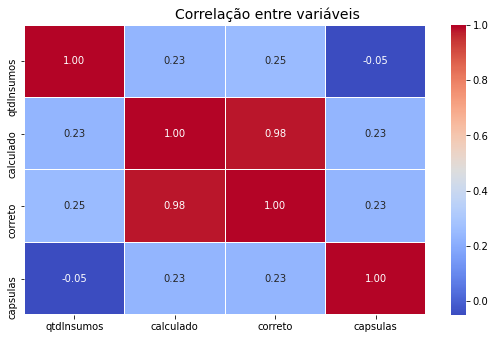

In [ ]:
# Correlação entre dados

f, ax = plt.subplots(figsize=(9,5))
corr = visualizar.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlação entre variáveis', fontsize=14)

Existe forte correlação positiva entre os valores 'calculado' e 'correto'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


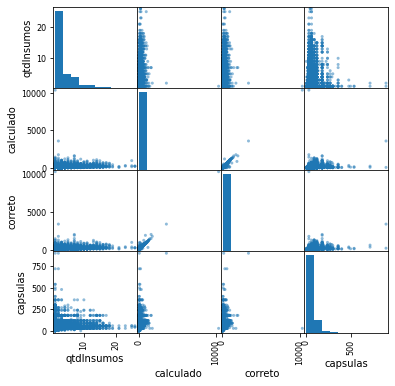

In [ ]:
f, ax = plt.subplots(figsize=(6,6))
_ = pd.plotting.scatter_matrix(visualizar, ax=ax)